# Exploration of The Influence of Changes in Bandwidth Values, Radar Frequency, and Chirp Frequency.

### Radar and Navigation - #1 Coding Task

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [20]:
def fmcw_explore(f_c, Bw, f_r):
    # Constant
    c = 3e8

    # FMCW Signal Parameters
    fc = f_c     # Carrier Frequency (Hz)
    bw = Bw      # Bandwidth (Hz)
    fr = f_r     # Chirp Frequency (Hz)
    tr = 1/fr    # Chirp period (Hz)

    # Time Range
    ns = 2**10                  # number of sample
    tg = np.linspace(0, 1, ns)  # generation of time vector

    
    """

    Transmitted FMCW Signal Generation

    """

    # initial condition
    st = np.zeros(ns, dtype=complex)  # transmitted signal
    ft = np.zeros(ns)                 # frequency of transmitted signal/sampling freq.

    # Sampling Frequency (Hz)
    for i in range(len(tg)):
        tg_i = tg[i]       # take the time value of the tg vector

        # for the chirp period after the first period
        while tg_i > tr:
            tg_i -= tr

        tg_i -= tr/2       # so that the frequency ft becomes the middle frequency
        st[i] = np.cos(2*np.pi*fc*tg_i + np.pi*bw*fr*(tg_i**2))
        ft[i] = fc + bw*fr*tg_i
        
    
    """

    FMCW Signal Plot

    """

    # Frequency Variation
    plt.plot(tg, ft/1000)
    plt.title('Frequency Variation of FMCW Signal at Transmitter')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (kHz)')
    plt.grid(True)
    plt.figure(figsize=(20, 13))

    plt.tight_layout()
    plt.show()
    
    # Target Parameters
    Rt = 45e3  # Target Distance (m)
    Vt = 10    # Target radial velocity (m/s)
    
    """

    Received Signal Generation

    """

    # initial condition
    srx = np.zeros(ns, dtype=complex)  # received signal
    frx = np.zeros(ns)                 # frequency of received signal

    for i in range(len(tg)):
        tg_i = tg[i]       # take the time value of the tg vector

        # calculate the time delay for receiving signals due to the distance factor
        t_delay = 2*Rt/c
        # calculates the signal time delay due to target movement
        t_delay += (2*tg_i*Vt/c)

        tg_i -= t_delay

        # for the chirp period after the first period
        while tg_i > tr:
            tg_i -= tr

        tg_i -= tr/2       # so that the frequency ft becomes the middle frequency
        srx[i] = np.cos(2 * np.pi * fc * tg_i + np.pi * bw * fr * (tg_i**2))
        frx[i] = fc + bw*fr*tg_i
    
    """

    Received FMCW Signal Plot

    """

    # Frequency Variation
    plt.plot(tg, ft/1000, 'b')
    plt.plot(tg, frx/1000, 'r')
    plt.title('Frequency Variation of FMCW Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (kHz)')
    plt.grid(True)
    plt.figure(figsize=(20, 13))

    plt.tight_layout()
    plt.show()
    
    """

    add Gaussian Noise

    """

    def noise(sig, req_snr):
        sig_energy = np.linalg.norm(sig) ** 2            # energy of the signal
        noise_energy = sig_energy / (10 ** (req_snr/10)) # energy of noise to be added
        noise_var = noise_energy / (len(sig) - 1)        # variance of noise
        noise_std = np.sqrt(noise_var)                   # std. deviation of noise
        noise = noise_std * np.random.randn(*sig.shape)  # noise
        noisy_sig = sig + noise                          # noisy signal

        return noisy_sig

    srn = noise(srx, 10)
    
    
    """

    Signal Processing

    """

    # Demodulation
    s_demod = srx * st

    # Graph 1 with Demodulation
    plt.figure(figsize=(8, 6))    
    plt.subplot(2, 1, 1)
    plt.plot(tg, s_demod)
    plt.title('Demodulated FMCW Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)    
    
    """

    Convert to Frequency Domain with FFT

    """

    n_fft = 2**int(np.ceil(np.log2(len(s_demod))))
    s_fft = np.fft.fftshift(np.fft.fft(s_demod, n_fft) / len(tg))
    f_axis = np.fft.fftshift(np.fft.fftfreq(n_fft, d=1/ns))

    plt.subplot(2, 1, 2)
    plt.plot(f_axis, np.abs(s_fft))
    plt.xlim([-ns/2, ns/2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)   

    plt.tight_layout()
    plt.show()
    
    # Identify the peak frequency by using the median value of the signal in the FFT
    m = len(s_fft) // 2
    peak, _ = find_peaks(np.abs(s_fft[m:]), height=0.2)
    fd = f_axis[m + peak]
    print(f"Peak Frequencies: {fd} Hz")

    # Calculate Target Range
    rest = c * fd * tr / (2*bw)
    print(f"Estimated target range: {rest/1000} km")

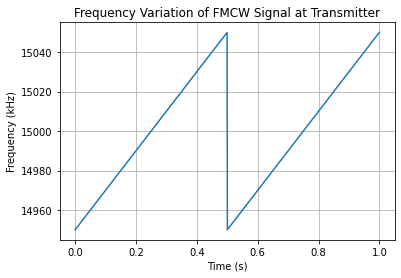

<Figure size 1440x936 with 0 Axes>

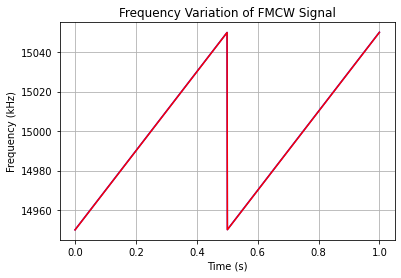

<Figure size 1440x936 with 0 Axes>

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


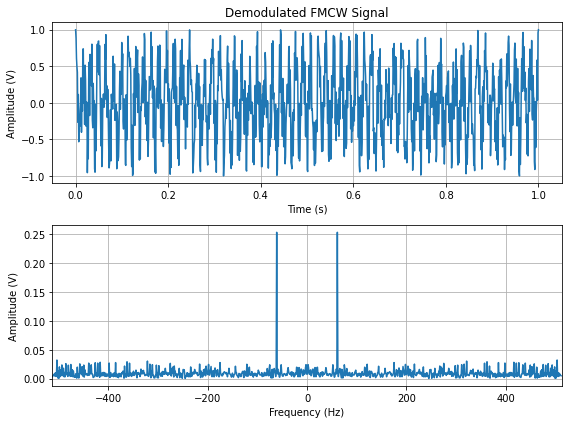

Peak Frequencies: [61.] Hz
Estimated target range: [45.75] km


In [21]:
fmcw_explore(15e6, 1e5, 2)